In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

# Linear Model Selection and Regularization

As we discussed before, the linear model is typically fitted using least squares. Today, we will discuss some ways in which the simple linear model can be improved, by replacing plain least squares fitting with some alternative fitting procedures. Why might we want to use another fitting procedure instead of least squares? As we will see, alternative fitting procedures can yield better prediction accuracy and model interpretability.
* **Prediction Accuracy**: Provided that the true relationship between the response and the predictors is approximately linear, the least squares estimates will have low bias. If n, the number of observations, is much larger than p, the number of variables—then the least squares estimates tend to also have low variance, and hence will perform well on test observations. However, if n is not much larger than p, then there can be a lot of variability in the least squares fit, resulting in overfitting and consequently poor predictions on future observations not used in model training. And if p > n, then there is no longer a unique least squares coefficient estimate: the variance is infinite so the method cannot be used at all. By using *shrinkage method*, we can often substantially reduce the variance at the cost of a negligible increase in bias
+ **Model Interpretability**: It is often the case that some or many of the variables used in a multiple regression model are in fact not associated with the response. Including such irrelevant variables leads to unnecessary complexity in the resulting model. By removing these variables—that is, by setting the corresponding coefficient estimatesto zero—we can obtain a model that is more easily interpreted.

In this chapter, we discuss two important classes of methods:

* **Subset Selection**:This approach involves identifying a subset of the p predictors that we believe to be related to the response. We then fit a model using least squares on the reduced set of variables.
+ **Shrinkage**: This approach involves fitting a model involving all p predictors. However, the estimated coefficients are shrunken towards zero relative to the least squares estimates. This *shrinkage* (also known as *regularization*) has the effect of reducing variance. Depending on what type of shrinkage is performed, some of the coefficients may be estimated to be exactly zero. Hence, shrinkage methods can also perform variable selection.

## Shinkage Method
The subset selection method involve using least
squares to fit a linear model that contains a subset of the predictors. As an
alternative, we can fit a model containing all p predictors using a technique
that constrains or regularizes the coefficient estimates, or equivalently, that
shrinks the coefficient estimates towards zero. It may not be immediately obvious why such a constraint should improve the fit, but it turns out that
shrinking the coefficient estimates can significantly reduce their variance.
The two best-known techniques for shrinking the regression coefficients
towards zero are ridge regression and the lasso.



### Ridge Regression
Ridge regression is very similar to least squares, except that the coefficients ridge are estimated by minimizing a slightly different quantity. The problem can be state by:
$$\min_{\beta} RSS \text{ subject to } \sum_{j=1}^p\beta_j^2<s$$
Using Lagrange multiplier, the problem is changed to:
$$\min_{\beta,\lambda} RSS + \lambda\sum_{j=1}^p\beta_j^2$$
Thus, we need to find both $\beta,\lambda$. The penalty $\lambda\sum_{j=1}^p\beta_j^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero. This may not be a problem for prediction
accuracy, but it can create a challenge in model interpretation in settings in which the number of variables p is quite large.

Now we will apply the Rigde Regression to Hitters data

In [2]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [3]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

The ${\tt Ridge()}$ function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [4]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix ${\tt coefs}$. In this case, it is a $19 \times 100$
matrix, with 19 rows (one for each predictor) and 100
columns (one for each value of alpha). Remember that we'll want to standardize the
variables so that they are on the same scale. To do this, we can use the
${\tt normalize=True}$ parameter:

In [5]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. Let's plot and find out:

Text(0,0.5,'weights')

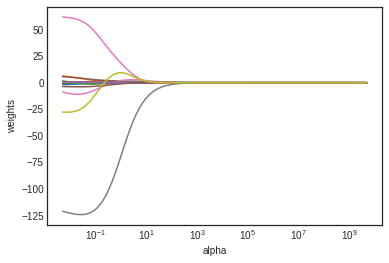

In [7]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression and the lasso:

In [8]:
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

Next we fit a ridge regression model on the training set, and evaluate
its MSE on the test set, using $\lambda = 4$:

In [9]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))        # Calculate the test MSE

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64
106216.52238005561


The test MSE when alpha = 4 is 106216. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [10]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))        # Calculate the test MSE

AtBat          1.317464e-10
Hits           4.647486e-10
HmRun          2.079865e-09
Runs           7.726175e-10
RBI            9.390640e-10
Walks          9.769219e-10
Years          3.961442e-09
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRuns          8.245247e-11
CRBI           7.795451e-11
CWalks         9.894387e-11
PutOuts        7.268991e-11
Assists       -2.615885e-12
Errors         2.084514e-10
League_N      -2.501281e-09
Division_W    -1.549951e-08
NewLeague_N   -2.023196e-09
dtype: float64
172862.23580379886


This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.

Okay, so fitting a ridge regression model with alpha = 4 leads to a much lower test
MSE than fitting a model with just an intercept. We now check whether
there is any benefit to performing ridge regression with alpha = 4 instead of
just performing least squares regression. Recall that least squares is simply
ridge regression with alpha = 0.

In [11]:
ridge2 = Ridge(alpha=0, normalize=True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))         # Calculate the test MSE

AtBat           -1.821115
Hits             4.259156
HmRun           -4.773401
Runs            -0.038760
RBI              3.984578
Walks            3.470126
Years            9.498236
CAtBat          -0.605129
CHits            2.174979
CHmRun           2.979306
CRuns            0.266356
CRBI            -0.598456
CWalks           0.171383
PutOuts          0.421063
Assists          0.464379
Errors          -6.024576
League_N       133.743163
Division_W    -113.743875
NewLeague_N    -81.927763
dtype: float64
116690.46856660453


It looks like we are indeed improving over regular least-squares!

Instead of arbitrarily choosing alpha $ = 4$, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, ${\tt RidgeCV()}$. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument ${\tt cv}$.

In [13]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5748784976988678

Therefore, we see that the value of alpha that results in the smallest cross-validation
error is 0.57. What is the test MSE associated with this value of
alpha?

In [14]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

99825.6489629273

This represents a further improvement over the test MSE that we got using
alpha $ = 4$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [15]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index=X.columns)

AtBat           0.055838
Hits            0.934879
HmRun           0.369048
Runs            1.092480
RBI             0.878259
Walks           1.717770
Years           0.783515
CAtBat          0.011318
CHits           0.061101
CHmRun          0.428333
CRuns           0.121418
CRBI            0.129351
CWalks          0.041990
PutOuts         0.179957
Assists         0.035737
Errors         -1.597699
League_N       24.774519
Division_W    -85.948661
NewLeague_N     8.336918
dtype: float64

As expected, none of the coefficients are exactly zero - ridge regression does not
perform variable selection!

### The Lasso
The Lasso using different constrant:
$$\min_{\beta} RSS \text{ subject to } \sum_{j=1}^p|\beta_j|<s$$
Using Lagrange multiplier, the problem is changed to:
$$\min_{\beta,\lambda} RSS + \lambda\sum_{j=1}^p|\beta_j|$$
This penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when
the tuning parameter $\lambda$ is sufficiently large.

We saw that ridge regression with a wise choice of alpha can outperform least
squares as well as the null model on the Hitters data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the ${\tt Lasso()}$ function; however, this time we'll need to include the argument ${\tt max_iter=10000}$.
Other than that change, we proceed just as we did in fitting a ridge model:

Text(0,0.5,'weights')

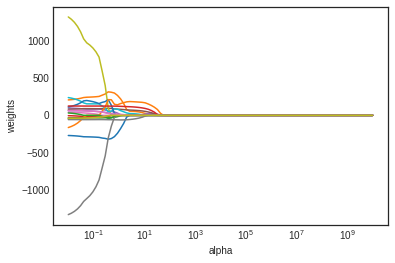

In [16]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [17]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.65853895503

This is substantially lower than the test set MSE of the null model and of
least squares, and only a little worse than the test MSE of ridge regression with alpha
chosen by cross-validation.

However, the lasso has a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 13 of
the 19 coefficient estimates are exactly zero:

In [18]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64